# HOMEWORK 1

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# QUESTION 1

*Consider an homogeneous multiplying material. We want to build a critical system (without the reflector). Neglecting the extrapolated length, find which configuration allows reaching criticality with the minimum amount of material (select between spherical, cylindrical with height equal to the diameter, cubic).*

**RESOLUTION:**

We are discussing about criticality condition, so the main assumption we have to make is that the *Geometrical Buckling* and the *Material Buckling* are equal as follow:

\begin{equation}
 B_g^{2} = B_m^{2} \equiv \frac{\nu \Sigma_f - \Sigma_a}{D}
\end{equation}

The three systems are made of the same material so all the three *Geometrical Bucklings* are equal. We can compare *Critical Masses* by expressing characteristic lenghts in function of *Geometrical Buckling*; since density is associated to the material, the comparison can be done by taking into account the three Volumes.

In [ ]:
#Variables

nu0 = sp.Symbol("nu_0", positive=True)
nu0_val = 2.405
Bg_sphere, Bg_cylinder, Bg_cube, Bg = sp.symbols("Bg_sphere, Bg_cylinder, Bg_cube, B_g", positive=True)

R_s = sp.Symbol("R_s", positive=True)
R_c, H_c = sp.symbols("R_c, H_c", positive=True)
a, b, c, l = sp.symbols("a, b, c, l", positive=True)

V_sphere, V_cylinder, V_cube = sp.symbols("V_sphere, V_cylinder, V_cube", positive=True)

In [ ]:
#Sphere

Geom_Buckling_Eq1 = sp.Eq(Bg_sphere**2, (sp.pi/R_s)**2)
Solution_Rs = sp.solve(Geom_Buckling_Eq1, R_s)[0]

Volume_Sphere = sp.Rational(4,3) * sp.pi * Solution_Rs**3

print("Volume of the Sphere:\n")
sp.Eq(V_sphere, Volume_Sphere)

Volume of the Sphere:



Eq(V_sphere, 4*pi**4/(3*Bg_sphere**3))

In [ ]:
#Cylinder

Geom_Buckling_Eq2 = sp.Eq(Bg_cylinder**2, (nu0/R_c)**2 + (sp.pi/H_c)**2)
Geom_Buckling_Eq2 = Geom_Buckling_Eq2.subs({R_c:H_c/2})
Solution_Hc = sp.solve(Geom_Buckling_Eq2, H_c)[0]

Volume_Cylinder = H_c * (sp.pi * R_c**2) #general problem H!=D
Volume_Cylinder = Volume_Cylinder.subs({R_c:H_c/2})
Volume_Cylinder = Volume_Cylinder.subs({H_c:Solution_Hc})

print("Volume of the Cylinder:\n")
sp.Eq(V_cylinder, Volume_Cylinder)

Volume of the Cylinder:



Eq(V_cylinder, pi*(4*nu_0**2 + pi**2)**(3/2)/(4*Bg_cylinder**3))

In [ ]:
#Cube

Geom_Buckling_Eq3 = sp.Eq(Bg_cube**2, (sp.pi/a)**2 + (sp.pi/b)**2 + (sp.pi/c)**2)
Geom_Buckling_Eq3 = Geom_Buckling_Eq3.subs({a:l, b:l, c:l})
Solution_l = sp.solve(Geom_Buckling_Eq3, l)[0]

Volume_parallel = a*b*c #general problem a!=b!=c
Volume_Cube = Volume_parallel.subs({a:l, b:l, c:l})
Volume_Cube = Volume_Cube.subs(l,Solution_l)

print("Volume of the Cube:\n")
sp.Eq(V_cube, Volume_Cube)

Volume of the Cube:



Eq(V_cube, 3*sqrt(3)*pi**3/Bg_cube**3)

In [ ]:
#Comparison between volumes imposing Bg equal in the three cases
Volume_Sphere = Volume_Sphere.subs({Bg_sphere: Bg}).evalf()
Volume_Cylinder = Volume_Cylinder.subs({Bg_cylinder: Bg, nu0:nu0_val}).evalf()
Volume_Cube = Volume_Cube.subs(Bg_cube, Bg).evalf()

print("Values of the three volumes:")
print("\nVolume Sphere:  "+str(Volume_Sphere))
print("\nVolume Cylinder:  "+str(Volume_Cylinder))
print("\nVolume Cube:  "+str(Volume_Cube))
print("\n\nThe configuration for the system that involves the minimum amount of material is the <spherical configuration>!")

Values of the three volumes:

Volume Sphere:  129.878788045337/B_g**3

Volume Cylinder:  148.926982497593/B_g**3

Volume Cube:  161.113339691452/B_g**3


The configuration for the system that involves the minimum amount of material is the <spherical configuration>!


# QUESTION 2

*Determine the critical composition and the flux of a finite slab reactor with a width of 50cm, composed of a homogeneous mixture of* ${^{235}U}$ *and* ${H_{2}O}$,*surrounded by an infinite reflector made of . Both the reflector and the core operate at a temperature of* $\bar T = 60°C$. *This reactor has a power density of* $q'''=25 \frac{W}{cm^{3}}$. *Assume thermal energies only*, $\nu=2.44$ *and* $\rho_{H_2 O} = 1\frac{g}{cm^{3}}$. *Use also the following data:*

*  $D_r = 0.16 cm$
*  $B_c = 0.05624 cm^{-1}$

*Assume also* $D_c\simeq D_r$ *(diluted fuel).*

*As most tables report values of the Microscopic Cross-Section at 20°C, we have to apply the following formula to take into account* $\bar T = 60°C$.



**RESOLUTION:**

Let's illustrate now the first approach to the problem of a slab reactor with a nonmultiplying reflector material. We will characterize the core region with the letter C and the reflector region with letter R.

The goal of the problem is to compute the flux in the reactor; to obtain the analytical expression for the flux, we have to solve the equations in the Core and Reflector region. We consider a slab reactor of width $l=50cm$ and an infinite reflector. The equations to solve are:

**EQUATIONS:**
\begin{aligned}
 &\\
 Core:\;\;\;\;&D^{C}\frac{d^{2}\phi^{C}(x)}{d x^{2}} + 
 (\nu\Sigma_{f}^{C} - \Sigma_{a}^{C})\phi^{C}(x) = 0 
 \;\;\;\;\;;\;\;\;\;\;0\leq x \leq \frac{l}{2} \\
 &\\
 Reflector:\;\;\;\;&D^{R}\frac{d^{2}\phi^{R}(x)}{d x^{2}} - \Sigma_{a}^{R}\phi^{R}(x) = 0 \;\;\;\;\;;\;\;\;\;\;\frac{l}{2} \leq x \leq \infty \\
 &\\
\end{aligned}

**BOUNDARY CONDITIONS**
\begin{aligned}
 &\\
 Interface:\;\;\;\;&(a)\;\;\;\;\phi^{C}(\frac{l}{2}) = \phi^{R}(\frac{l}{2})\\
 &\\
 \;\;\;\;\;\;\;\;\;&(b)\;\;\;\;J^{C}(\frac{l}{2}) = J^{R}(\frac{l}{2})\\
 &\\
 Infinite:\;\;\;\;&(c)\;\;\;\;\phi^{R}(x \rightarrow \infty) < \infty\\
 &\\
\end{aligned}

The solutions to these kind of differential equations are well known to be in the form of Cosine - Sine for what concers the Core Equation, and in the form of exponentials for what concers the Reflector Equation.

**SOLUTIONS:**

\begin{aligned}
 &\\
 Core:\;\;\;\;&\phi^C(x) = A_C\;cos(B_{m}^{C}\,x) + B_C\;sin(B_{m}^{C}\,x) \\
 &\\
 Reflector:\;\;\;\;&\phi^R(x) = A_R\;exp(-\frac{x}{L_R^2}) + 
 B_R\;exp(\frac{x}{L_R^2}) \\
 &\\
\end{aligned}


(the other passages will be described along with the relative script).

In [ ]:
#Data

l_val = 50#cm
Tbar_val = 60#°C
nubar_val = 2.44
rho_H2O_val = 1#g/cm3
Dc_val = 0.16#cm
Dr_val = 0.16#cm
Bc_val = 0.05624#cm^-1
M_235_val = 235.043924#g/mol
M_H2O_val = 18.016#g/mol
Nav_val = 6.022*10**23 #atm/mol
sigmaa_H2O_zero = 0.66*10**-24#cm^2
sigmaf_235_zero = 577*10**-24#cm^2
sigmaa_235_zero = 678*10**-24#cm^-2 (577 + 101)
EnergyXfission = 192.9#MeV/fission
ConvCoeff = 1.602176565*10**-19#J/ev
q3_val = 25#W/cm3


#Variables and Functions

x, h, k = sp.symbols("x, h, k")

Dc, Dr, Sigmaf_c, Sigmaa_c, Sigmaa_r,Sigmaa_235, nubar, l = sp.symbols("D^{C}, D^{R}, \Sigma_{f}^{C}, \Sigma_{a}^{C}, \Sigma_{a}^{R},\Sigma_{a}^{235}, nu, l")

rho_H2O, N_235, N_H2O, M_235, M_H2O, sigmaf_235, sigmaa_235, sigmaa_H2O, Nav = sp.symbols("rho_H2O, N_235, N_H2O, M_235, M_H2O, sigma_{f}^{235}, sigma_{a}^{235} sigma_H2O, N_AV")


Bc, Lr = sp.symbols("B_{m}^{C}, L^{R}")  #Bc Material Buckling for the core region

Ac, Ar, Br = sp.symbols("A_C, A_R, B_R") #Constants in the equations
C1, C2 = sp.symbols("C1,C2")

PhiC, PhiR = sp.symbols("Phi_C, Phi_R", cls=sp.Function) #Fluxes
Jc, Jr = sp.symbols("J_C, J_R", cls=sp.Function)          #Currents

In [ ]:
#Core Equation
Core_Equation = sp.Eq(PhiC(x).diff(x,2) + (Bc**2)*PhiC(x) , 0)
Core_Equation

Eq(B_{m}^{C}**2*Phi_C(x) + Derivative(Phi_C(x), (x, 2)), 0)

In [ ]:
#Core Solution - we take only the cosine to maintain the simmetry of the problem
Core_Solution = sp.Eq(PhiC(x) , Ac*sp.cos(Bc*x))
Core_Solution

Eq(Phi_C(x), A_C*cos(B_{m}^{C}*x))

In [ ]:
#Reflector Equation
Reflector_Equation = sp.Eq(PhiR(x).diff(x,2) - (1/(Lr**2))*PhiR(x) , 0)
Reflector_Equation

Eq(Derivative(Phi_R(x), (x, 2)) - Phi_R(x)/L^{R}**2, 0)

In [ ]:
#Reflector Solution
Reflector_Solution = sp.dsolve(Reflector_Equation , PhiR(x))
Reflector_Solution = Reflector_Solution.subs({C1:Ar, C2:Br})
Reflector_Solution

Eq(Phi_R(x), A_R*exp(-x/L^{R}) + B_R*exp(x/L^{R}))

In [ ]:
#Imposing BC (c) - Br=0
Reflector_Solution = Reflector_Solution.subs(Br,0)
Reflector_Solution

Eq(Phi_R(x), A_R*exp(-x/L^{R}))

In [ ]:
#Imposing BC (a) - equal fluxes at the Interface
Flux_CoreInt = Core_Solution.subs(x,(l/2))
Flux_ReflInt = Reflector_Solution.subs(x,(l/2))
Fluxes_Int_Equation = sp.Eq(Flux_CoreInt.rhs , Flux_ReflInt.rhs)
Fluxes_Int_Equation

Eq(A_C*cos(B_{m}^{C}*l/2), A_R*exp(-l/(2*L^{R})))

In [ ]:
#Imposing BC (b) - equal currents at the Interface

#Core Current
Current_Core = - Dc * Core_Solution.rhs.diff(x)
Current_Core_Int = Current_Core.subs(x,(l/2))
sp.Eq(Jc(l/2) , Current_Core_Int)

Eq(J_C(l/2), A_C*B_{m}^{C}*D^{C}*sin(B_{m}^{C}*l/2))

In [ ]:
#Reflector Current
Current_Reflector = - Dr * Reflector_Solution.rhs.diff(x)
Current_Reflector_Int = Current_Reflector.subs(x,(l/2))
sp.Eq(Jr(l/2) , Current_Reflector_Int)

Eq(J_R(l/2), A_R*D^{R}*exp(-l/(2*L^{R}))/L^{R})

In [ ]:
Currents_Int_Equation = sp.Eq(Current_Core_Int , Current_Reflector_Int)
Currents_Int_Equation

Eq(A_C*B_{m}^{C}*D^{C}*sin(B_{m}^{C}*l/2), A_R*D^{R}*exp(-l/(2*L^{R}))/L^{R})

In [ ]:
#Currents Equation / Fluxes Equation to obtain the trascendental equation

LHS_Member = (Current_Core_Int / Flux_CoreInt.rhs)
RHS_Member = (Current_Reflector_Int / Flux_ReflInt.rhs)
print("LHS Member: " + str(LHS_Member) + "\n")
print("RHS Member: " + str(RHS_Member) + "\n")

#I introduce h that substitutes Bc*(l/2) that is contained in LHS brackets to express better the equation

RHS_Member = (RHS_Member/(Dc*Bc)) * (l/2)*(Bc/h)

LHS_Member = LHS_Member/(Dc*Bc)
LHS_Member = LHS_Member.subs((Bc*l/2),h)
LHS_Member = LHS_Member.subs(sp.sin(h)/sp.cos(h) , sp.tan(h))
sp.Eq(LHS_Member , RHS_Member)

LHS Member: B_{m}^{C}*D^{C}*sin(B_{m}^{C}*l/2)/cos(B_{m}^{C}*l/2)

RHS Member: D^{R}/L^{R}



Eq(tan(h), D^{R}*l/(2*D^{C}*L^{R}*h))

This solution represents a *Trascendental Equation* that we can solve by plotting the two sides and observing the intersection point between the curves. We have all the data in this equation with the exeption of $L^{R}$, that we will compute below. Since we know all the parameters, it is not necessary to work on this equation for what concerns the goal of the excercise, but I decided to try to observe the curve just to check if the method is consistent with the data than we have for $B_{m}^{C}$.

In order to compute $L^{R}$ we need to know Atomic Density $N_{H_2 O}$ and the Microscopic cross-section $\sigma_{a}^{H_2 O}$.

We can compute $\sigma_{a}^{H_2 O}$ as follow:
\begin{equation}
 \sigma_{a}^{H_2 O} = \sigma_{a_{0}}^{H_2 O}  (\frac{T_0}{\bar T})^{\frac{1}{2}}
\end{equation}

We can follow the following procedure to compute $L^{R}$:
\begin{aligned}
&\\
&N_{H_2 O} = \rho_{H_2 O}\;\frac{N_{AV}}{M_{H_2 O}} \\
&\\
&\Sigma_{a}^{R} = N_{H_2 O}\;\;\sigma_{a}^{H_2 O}
&\\
&\\
&L^{R} = \sqrt{\frac{D^{R}}{\Sigma_{a}^{R}}}
&\\
\end{aligned}

In [ ]:
Atomic_Density_H2O = rho_H2O * (Nav/M_H2O)
Sigmaa_r_exp = Atomic_Density_H2O * sigmaa_H2O
Lr_exp = sp.sqrt(Dr/Sigmaa_r_exp)

print("EXPRESSIONS:\n")
print("Atomic Densisty of Water: " + str(Atomic_Density_H2O))
print("Macroscopic Sigma Absorption of Reflector region: " + str(Sigmaa_r_exp))
print("Diffusion Lenght for Reflector Region: " + str(Lr_exp))

sigmaa_H2O_val = sigmaa_H2O_zero*(293/333)**(1/2)
Atomic_Density_H2O_val = rho_H2O_val * (Nav_val/M_H2O_val)
Sigmaa_r_val = Atomic_Density_H2O_val * sigmaa_H2O_val
Lr_val = sp.sqrt(Dr_val/Sigmaa_r_val).evalf()

print("\nVALUES:\n")
print("Atomic Densisty of Water: " + str(Atomic_Density_H2O_val) + " atm/cm3")
print("Microscopic Absorption Cross-section for Water: " + str(sigmaa_H2O_val) + " cm^2")
print("Macroscopic Sigma Absorption of Reflector region: " + str(Sigmaa_r_val) + " cm^-1")
print("Diffusion Lenght for Reflector Region: " + str(Lr_val) + " cm")

EXPRESSIONS:

Atomic Densisty of Water: N_AV*rho_H2O/M_H2O
Macroscopic Sigma Absorption of Reflector region: N_AV*rho_H2O*sigma_H2O/M_H2O
Diffusion Lenght for Reflector Region: sqrt(D^{R}*M_H2O/(N_AV*rho_H2O*sigma_H2O))

VALUES:

Atomic Densisty of Water: 3.3425843694493783e+22 atm/cm3
Microscopic Absorption Cross-section for Water: 6.190926228567707e-25 cm^2
Macroscopic Sigma Absorption of Reflector region: 0.020693693244024605 cm^-1
Diffusion Lenght for Reflector Region: 2.78061581064807 cm


Graphically we obtain a value for $h$ such that the condition $h < \frac{\pi}{2}$ is valid !!

Equation evaluated: Eq(tan(h), 8.99081415859938/h)

Value of h from data: 1.406



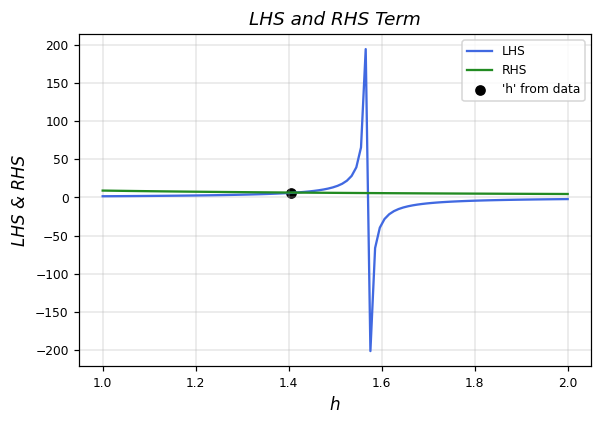

In [ ]:
#Back to trascendent equation
RHS_Member = RHS_Member.subs({Dr:Dr_val, Dc:Dc_val, Lr:Lr_val, l:l_val})
print("Equation evaluated: " + str(sp.Eq(LHS_Member , RHS_Member)))
print("\nValue of h from data: " + str(Bc_val * l_val / 2) + "\n")

k = np.linspace(1,2,100)

LHS1 = sp.lambdify(h, LHS_Member)
LHS2 = LHS1(k)
RHS1 = sp.lambdify(h, RHS_Member)
RHS2 = RHS1(k)

plt.figure(figsize=[6,4], dpi=110)
plt.plot(k, LHS2, "royalblue", label="LHS")
plt.plot(k, RHS2, "forestgreen", label="RHS")

plt.xlabel('h', fontsize=11, fontstyle="italic")
plt.ylabel('LHS & RHS', fontsize=11, fontstyle="italic")
plt.title('LHS and RHS Term', fontsize=12, fontstyle="italic")

plt.grid("gray",linestyle = "-", linewidth=0.3)
plt.scatter((Bc_val * l_val / 2) , RHS1(Bc_val * l_val / 2), marker="o", color="black", label="'h' from data")
plt.xticks(size=8)
plt.yticks(size=8)
plt.legend(fontsize=8)

The firt goal of QUESTION 2 is the Critical Composition of the slab reactor. We know $B_{m}^{C}$, $D^{C}$, $D^{R}$, $\Sigma_{a}^{R}$ (and $L^{R}$). We are able to compute the ratio between the Atomic Densities of $H_2 O$ and $^{235}U$.

We know the expression of the Material Buckling that we recall:

\begin{equation}
\\
 (B_m^{C})^{2} \equiv \frac{\nu \Sigma_{f}^{235} - \Sigma_{a}^{C}}{D^{C}}
\\
\end{equation}

Since fission is only determined by $^{235}U$, the $\Sigma_{f}^{C}$ is equal to $\Sigma_{f}^{235}$. We are also in the approximation of diluted fuel wher $D^{C}\sim D^{R} = L^{R^{2}}\;\Sigma_{a}^{H_2 O}$ so we can follow the subsequent procedure:

\begin{aligned}
&\\
&(B_m^{C})^{2} = \frac{\nu \Sigma_{f}^{235} - \Sigma_{a}^{C}}{D^{C} } \\
&\\
&(B_m^{C})^{2}\;D^{C} = \nu \sigma_{f}^{235} N_{235} - \sigma_{a}^{235} N_{235} - \sigma_{a}^{H_2 O} N_{H_2 O} \\
&\\
&(B_m^{C})^{2}\;L^{R^{2}}\;\sigma_{a}^{H_2 O} N_{H_2 O} =
\nu \sigma_{f}^{235} N_{235} - \sigma_{a}^{235} N_{235} - 
\sigma_{a}^{H_2 O} N_{H_2 O} \\
&\\
\end{aligned}

Dividing by $\sigma_{a}^{H_2 O} N_{H_2 O}$ and organizing well:

\begin{equation}
\\
\frac{N_{235}}{N_{H_2 O}} = ((B_m^{C})^{2}\;L^{R^{2}} + 1)
\frac{\sigma_{a}^{H_2 O}}{\nu \sigma_{f}^{235} - \sigma_{a}^{235}}
\\
\end{equation}

We can multiply both member for $N_{H_2 O} = \rho_{H_2 O}\;\frac{N_{AV}}{M_{H_2 O}}$ and use the value for the density of water alone since (a posteriori) we can note that the ratio is very low. By doing so we are able to compute the Atomic Density of $^{235}U$, its $\Sigma_{f}^{235}$, and also the $\Sigma_{a}^{C}$.

In [ ]:
RatioAtomic_Densities = ((Bc**2 * Lr**2) + 1) * (sigmaa_H2O / (nubar*sigmaf_235 - sigmaa_235))
Atomic_Density_235 = RatioAtomic_Densities * rho_H2O * (Nav / M_H2O)
Atomic_Density_H2O = rho_H2O * (Nav/M_H2O)

print("EXPRESSIONS:\n")
print("Ratio between Atomic Densities: " + str(RatioAtomic_Densities))
print("Atomic Densisty of Water: " + str(Atomic_Density_H2O))
print("Atomic Densisty of Uranium-235: " + str(Atomic_Density_235))

sigmaf_235_val = sigmaf_235_zero*(293/333)**(1/2)
sigmaa_235_val = sigmaa_235_zero*(293/333)**(1/2)
RatioAtomic_Densities_val = ((Bc_val**2 * Lr_val**2) + 1) * (sigmaa_H2O_val / (nubar_val*sigmaf_235_val - sigmaa_235_val))
Atomic_Density_235_val = RatioAtomic_Densities_val * rho_H2O_val * (Nav_val / M_H2O_val)
Sigmaf_c_val = Atomic_Density_235_val * sigmaf_235_val
Sigmaa_235_val = Atomic_Density_235_val * sigmaa_235_val
Sigmaa_c_val = Sigmaa_235_val + Sigmaa_r_val

print("\nVALUES:\n")
print("Microscopic Fission Cross-section for Uranium-235: " + str(sigmaf_235_val) + " cm^2")
print("Microscopic Absorption Cross-section for Uranium-235: " + str(sigmaa_235_val) + " cm^2")
print("Ratio between Atomic Densities: " + str(RatioAtomic_Densities_val))
print("Atomic Densisty of Water: " + str(Atomic_Density_H2O_val) + " atm/cm3")
print("Atomic Densisty of Uranium-235: " + str(Atomic_Density_235_val) + " atm/cm3")
print("Macroscopic Fission Cross-section for Uranium-235: " + str(Sigmaf_c_val) + " cm^-1")
print("Macroscopic Absorption Cross-section for Uranium-235: " + str(Sigmaa_235_val) + " cm^-1")
print("Macroscopic Absorption Cross-section for the Core: " + str(Sigmaa_c_val) + " cm^-1")

EXPRESSIONS:

Ratio between Atomic Densities: sigma_H2O*(B_{m}^{C}**2*L^{R}**2 + 1)/(nu*sigma_{f}^{235} - sigma_{a}^{235})
Atomic Densisty of Water: N_AV*rho_H2O/M_H2O
Atomic Densisty of Uranium-235: N_AV*rho_H2O*sigma_H2O*(B_{m}^{C}**2*L^{R}**2 + 1)/(M_H2O*(nu*sigma_{f}^{235} - sigma_{a}^{235}))

VALUES:

Microscopic Fission Cross-section for Uranium-235: 5.41237035436904e-22 cm^2
Microscopic Absorption Cross-section for Uranium-235: 6.359769671165007e-22 cm^2
Ratio between Atomic Densities: 0.000926372120508037
Atomic Densisty of Water: 3.3425843694493783e+22 atm/cm3
Atomic Densisty of Uranium-235: 3.09647697030384e+19 atm/cm3
Macroscopic Fission Cross-section for Uranium-235: 0.0167592801570590 cm^-1
Macroscopic Absorption Cross-section for Uranium-235: 0.0196928803231993 cm^-1
Macroscopic Absorption Cross-section for the Core: 0.0403865735672239 cm^-1


The second goal of QUESTION 2 is the flux evaluation. We recall the solutions of the equations for the two regions:

\begin{aligned}
&\\
&\phi^{C}(x) = A_C\;cos(B_{m}^{C}\;x) \\
&\\
&\phi^{R}(x) = A_R\;exp(- \frac{x}{L^{R}})
&\\
\end{aligned}

We know the Thermal Power Density $q'''[\frac{W}{cm^{3}}]$; since this quantity should depend on the position because the flux depends on the position, I have taken this quantity as the correspondent density when the flux is averaged on the core. In this way we are able to compute $A_C$ which represents the maximum flux at $x=0$.

\begin{equation}
\\
q'''[\frac{W}{cm^{3}}] = N_{235} [\frac{atm}{cm^{3}}] * \sigma_{f}^{235}(\bar T) [cm^{2}] * <\phi^{C}> [\frac{n}{cm^{2} sec}] * \bar E [\frac{MeV}{fission}] * C [\frac{J}{eV}] \\
\\
\end{equation}

We can compute the mean value of the flux $<\phi^{C}>$ as an integral over the core:

\begin{aligned}
&\\
<\phi^{C}> &= \frac{1}{l} \int_{-l/2}^{l/2} A_C\;cos(B_{m}^{C} x)\;dx \\
&\\
&=\frac{2 A_C}{l\;B_{m}^{C}}\;sen(B_{m}^{C}\;\frac{l}{2}) \\
&\\
\end{aligned}

By computing $A_C$ we are computing effectively the maximum value of the flux: $A_C = \phi_{max}^{C}$.

Then we can compute $A_R$ by applying the BC at the interface ($x=\frac{l}{2}$).

\begin{equation}
\\
A_R\;exp(- \frac{l}{2 L^{R}}) = \phi_{max}^{C}\;cos(B_{m}^{C}\;\frac{l}{2})\\
\\
\end{equation}

In [ ]:
PhiC_max = sp.symbols("phi_max")
PhiC_max_val = (q3_val * Bc_val * l_val) / (2 * Atomic_Density_235_val * sigmaf_235_val * EnergyXfission * (10**6) * ConvCoeff * sp.sin(Bc_val * l_val/2))
print("Maximum value of the Flux at x=0: " + str(PhiC_max_val/(10**13)) + " * 10^13 n/(cm2 sec)")

Ar_val = (PhiC_max_val * sp.cos(Bc_val * (l_val/2)).evalf()) / (sp.exp(-l_val/(2 * Lr_val)).evalf())
print("Value for Ar coefficient: " + str(Ar_val) + " n/(cm2 sec)")

Maximum value of the Flux at x=0: 6.87941487514395 * 10^13 n/(cm2 sec)
Value for Ar coefficient: 9.06134098464786e+16 n/(cm2 sec)


In [ ]:
#Flux in the Core
Core_Solution = Core_Solution.subs(Ac,PhiC_max)
Core_Solution

Eq(Phi_C(x), phi_max*cos(B_{m}^{C}*x))

In [ ]:
#Flux in the Reflector
Reflector_Solution = Reflector_Solution.subs(x,abs(x))
Reflector_Solution

Eq(Phi_R(Abs(x)), A_R*exp(-Abs(x)/L^{R}))

Text(-26.0, -0.28, '-l/2')

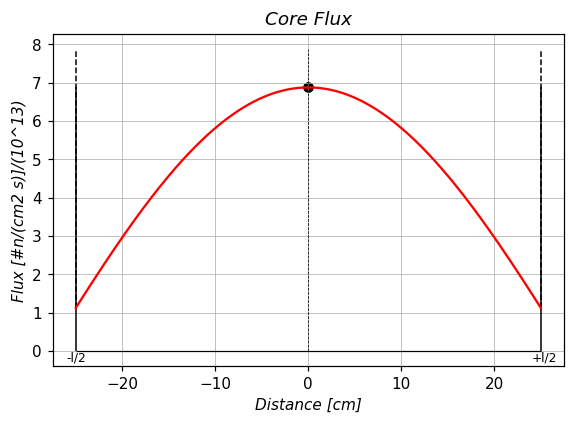

In [ ]:
#Plotting Core Flux

distance0 = np.linspace(-l_val/2,l_val/2, 400)
Core_Solution2 = Core_Solution.subs({PhiC_max:PhiC_max_val, Bc:Bc_val})
FluxCore0 = sp.lambdify(x,Core_Solution2.rhs)
FluxCore00 = FluxCore0(distance0)/(10**13)

plt.figure(figsize=[6,4], dpi=110)
plt.plot(distance0, FluxCore00, "red")

plt.vlines(-l_val/2, 0, max(FluxCore00), color="black", linestyle="-", linewidth=1)
plt.vlines(l_val/2, 0, max(FluxCore00), color="black", linestyle="-", linewidth=1)
plt.vlines(-l_val/2, min(FluxCore00), max(FluxCore00)+1, color="black", linestyle="--", linewidth=1)
plt.vlines(l_val/2, min(FluxCore00), max(FluxCore00)+1, color="black", linestyle="--", linewidth=1)
plt.vlines(0, 0, max(FluxCore00)+1, color="black", linestyle="--", linewidth=0.5)
plt.hlines(0,-l_val/2,l_val/2, color="black", linewidth=0.8)
plt.scatter(0, PhiC_max_val/(10**13), marker="o", color="black")

plt.grid("gray", linestyle="-", linewidth=0.5)
plt.xlabel("Distance [cm]", fontsize=10, fontstyle="italic")
plt.ylabel("Flux [#n/(cm2 s)]/(10^13)", fontsize=10, fontstyle="italic")
plt.title("Core Flux", fontsize=12, fontstyle="italic")
plt.annotate("+l/2", (l_val/2-1,-0.28), fontsize=8)
plt.annotate("-l/2", (-l_val/2-1,-0.28), fontsize=8)

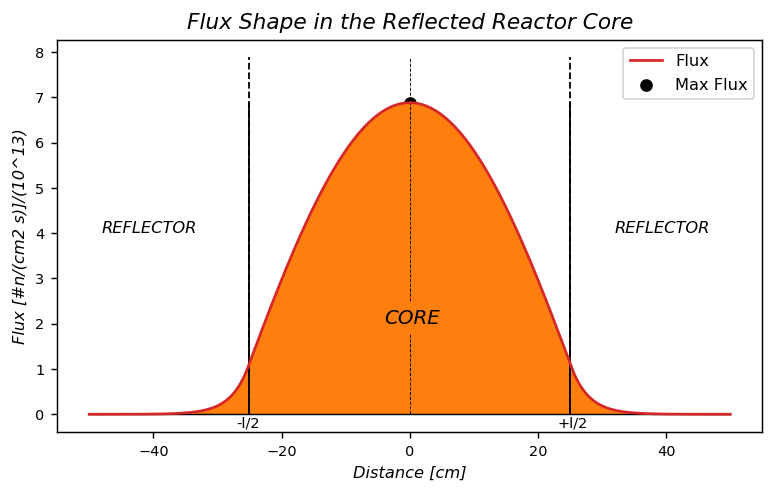

In [ ]:
#Plottig Core Flux + Reflector Flux

distance1 = np.linspace( -50,-l_val/2, 400)
distance2 = np.linspace(-l_val/2,l_val/2,400)
distance3 = np.linspace(l_val/2, 50, 400)

FluxCore2 = FluxCore0(distance2)/(10**13)

Reflector_Solution2 = Reflector_Solution.subs({Ar:Ar_val, Lr:Lr_val})
FluxReflector0 = sp.lambdify(x,Reflector_Solution2.rhs)
FluxReflector1 = FluxReflector0(distance1)/(10**13)
FluxReflector3 = FluxReflector0(distance3)/(10**13)

graphFluxes = np.concatenate((FluxReflector1, FluxCore2, FluxReflector3), axis=None)
graphDistance = np.concatenate((distance1, distance2, distance3), axis=None)

plt.figure(figsize=[7,4], dpi=130)
plt.plot(graphDistance, graphFluxes, color="tab:red", label="Flux")

plt.vlines(-l_val/2, min(FluxReflector1), max(FluxCore2), color="black", linestyle="-", linewidth=1)
plt.vlines(l_val/2, min(FluxReflector3), max(FluxCore2), color="black", linestyle="-", linewidth=1)
plt.vlines(-l_val/2, min(FluxReflector1), max(FluxCore2)+1, color="black", linestyle="--", linewidth=1)
plt.vlines(l_val/2, min(FluxReflector3), max(FluxCore2)+1, color="black", linestyle="--", linewidth=1)
plt.vlines(0, 2.5, max(FluxCore2)+1, color="black", linestyle="--", linewidth=0.5)
plt.vlines(0, min(FluxReflector3), 1.8, color="black", linestyle="--", linewidth=0.5)
plt.hlines(0,-50,50, color="black", linewidth=0.8)
plt.scatter(0,PhiC_max_val/(10**13), marker="o", color="black", label="Max Flux")

plt.annotate("CORE", (-4,2), fontsize=11, fontstyle="italic", rotation=0)
plt.annotate("REFLECTOR", (-48,4), fontsize=9, fontstyle="italic", rotation=0)
plt.annotate("REFLECTOR", (32,4), fontsize=9, fontstyle="italic", rotation=0)
plt.annotate("+l/2", (l_val/2-2,-0.28), fontsize=8)
plt.annotate("-l/2", (-l_val/2-2,-0.28), fontsize=8)

plt.legend(fontsize=9)
plt.xlabel("Distance [cm]", fontsize=9, fontstyle="italic")
plt.ylabel("Flux [#n/(cm2 s)]/(10^13)", fontsize=9, fontstyle="italic")
plt.title("Flux Shape in the Reflected Reactor Core", fontsize=12, fontstyle="italic")

plt.xticks(size=8)
plt.yticks(size=8)

plt.fill(graphDistance , graphFluxes, "tab:orange")

**RECAP FINAL SOLUTION**

*REFLECTOR COMPOSITION:*

* $\sigma_{a}^{H_2 O} = 6.19093* 10^{-25} cm^2$
* $\Sigma_{a}^{R} = 0.02069\; cm^{-1}$
* $L^{R} = 2.78061\; cm$
* $A_{R} = 9.06134 * 10^{16} \; \frac{n}{cm^{2} sec}$

*CORE COMPOSITION:*

* $\sigma_{f}^{235} = 5.41237 * 10^{-22}\; cm^{2}$
* $\sigma_{a}^{235} =  6.30349 * 10^{-22}\; cm^{2}$
* $\frac{N_{235}}{N_{H_2 O}} = 0.00092 = 9.2 * 10^{-4} $
* $\Sigma_{f}^{235} = 0.016759\; cm^{-1}$
* $\Sigma_{a}^{235} = 0.01969\; cm^{-1}$

* $\Sigma_{a}^{C} = 0.04039\; cm^{-1}$

* $\phi_{max}^{C} = 6.87941 * 10^{13}\; \frac{n}{cm^{2} sec}$

# QUESTION 3

*Based on the one-speed diffusion model, derive the criticality equation for the three-region slab reactor and compute the Critical Width 'a'. The three regions are:*

* *Core: composition as Problem 2 and operating at the same temperature (60°C)*
* *Blanket: composed of an homogeneous mixture of natural Uranium and Water with* $\frac{N_{U nat}}{N_{H_2 O}} = 0.01$*, Width b = 5 cm and temperature of 20°C*
* *Reflector: composed of Water with infinite width and temperature of 20°C ( same composition as Problem 2 but different operatig temperature)*

*Compare the results of Problem 2 and Problem 3 and discuss.*

**RESOLUTION:**

As seen in the previous Problem, we have to solve the equations for the regions of interest. In this case we have not only the Core with a multiplying material, but also the Blanket region that contains Natural Uranium. This latter region have the same equation as the Core but is better to express the analitycal solution as a summation of hyperbolic cosine and sine. The equations to solve are:


**EQUATIONS:**
\begin{aligned}
 &\\
 Core:\;\;\;\;&D^{C}\frac{d^{2}\phi^{C}(x)}{d x^{2}} + 
 (\nu\Sigma_{f}^{C} - \Sigma_{a}^{C})\phi^{C}(x) = 0 
 \;\;\;\;\;;\;\;\;\;\;0\leq x \leq \frac{a}{2} \\
 &\\
 Blanket:\;\;\;\;&D^{B}\frac{d^{2}\phi^{B}(x)}{d x^{2}} - 
 (\Sigma_{a}^{B} - \nu\Sigma_{f}^{B})\phi^{B}(x) = 0
 \;\;\;\;\;;\;\;\;\;\;\frac{a}{2} \leq x \leq \frac{a}{2} + b \\
 &\\
 Reflector:\;\;\;\;&D^{R}\frac{d^{2}\phi^{R}(x)}{d x^{2}} - \Sigma_{a}^{R}\phi^{R}(x) = 0 \;\;\;\;\;;\;\;\;\;\;\frac{a}{2} + b \leq x \leq \infty \\
 &\\
\end{aligned}

**Note:**

We have written the equation for the Blanket in such a way in order to express the solution in $sinh$ and $cosh$; the Buckling has a minus sign in it.

**BOUNDARY CONDITIONS:**
\begin{aligned}
 &\\
 Interface:\;\;\;\;&(a)\;\;\;\;\phi^{C}(\frac{a}{2}) = \phi^{B}(\frac{a}{2})\\
 &\\
 \;\;\;\;\;\;\;\;\;&(b)\;\;\;\;J^{C}(\frac{a}{2}) = J^{B}(\frac{a}{2})\\
 &\\
 \;\;\;\;\;\;\;\;\;&(c)\;\;\;\;\phi^{B}(\frac{a}{2} + b) = \phi^{R}(\frac{a}{2} + b)\\
 &\\
 \;\;\;\;\;\;\;\;\;&(d)\;\;\;\;J^{B}(\frac{a}{2} + b) = J^{R}(\frac{a}{2} + b)\\
 &\\
 Infinite\;\;\;\;\;&(e)\;\;\;\;\phi^{R}(x \rightarrow \infty) < \infty\\
 &\\
\end{aligned}

**SOLUTIONS:**

\begin{aligned}
 &\\
 Core:\;\;\;\;&\phi^C(x) = A_C\;cos(B_{m}^{C}\,x) + B_C\;sin(B_{m}^{C}\,x) \\
 &\\
 Blanket:\;\;\;\;&\phi^B(x) = A_B\;cosh(B_{m}^{B}\,x) + 
 B_B\;sinh(B_{m}^{B}\,x)\\
 &\\
 Reflector:\;\;\;\;&\phi^R(x) = A_R\;exp(-\frac{x}{L_R^2}) + 
 B_R\;exp(\frac{x}{L_R^2}) \\
 &\\
\end{aligned}


(the other passages will be described along with the relative script).

In [ ]:
#Data

b_val = 5#cm
nubar_val = 2.44
rho_H2O_val = 1#g/cm3
rho_U_val = 19.1#g/cm3
Dc_val = 0.16#cm
Dr_val = 0.16#cm
Bmc_val = 0.05624#cm^-1
M_235_val = 235.043924#g/mol
M_238_val = 238.050785#g/mol
iso235_val = 0.0072
iso238_val = 0.99275
M_H2O_val = 18.016#g/mol
Nav_val = 6.022*10**23 #atm/mol
sigmaa_H2O_zero = 0.66*10**-24#cm^2
sigmaf_235_zero = 577*10**-24#cm^2
sigmaa_235_zero = 678*10**-24#cm^-2 (577 + 101)
sigmaa_238_zero = 2.73*10**-24#cm^-2
NU_NW_val = 0.01



#Variables and Functions

x, h, k = sp.symbols("x, h, k")

Dc,Db, Dr, Sigmaf_c, Sigmaa_c, Sigmaa_r, Sigmaa_b, Sigmaa_235, nubar, a = sp.symbols("D^{C}, D^{B}, D^{R}, \Sigma_{f}^{C}, \Sigma_{a}^{C}, \Sigma_{a}^{R}, \Sigma_{a}^{B}, \Sigma_{a}^{235}, nu, a")

rho_U, rho_H2O, N_235, N_H2O, M_235, M_238, M_H2O, sigmaf_235, sigmaa_235, sigmaa_H2O, sigmaa_238, Nav, NU_NW, iso235, iso238 = sp.symbols("rho_U, rho_H2O, N_235, N_H2O, M_235, M_238, M_H2O, \sigma_{f}^{235}, \sigma_{a}^{235}, \sigma_H2O, \sigma_{a}^{238}, N_AV, \frac{NU}{NW}, \gamma_{235}, \gamma_{238}")


Bmc, Bmb, Lr = sp.symbols("B_{m}^{C}, B_{m}^{B}, L^{R}")  #Bc Material Buckling for the core region

Ac, Ab, Bb, Ar, Br = sp.symbols("A_C, A_B, B_B, A_R, B_R") #Constants in the equations
C1, C2 = sp.symbols("C1,C2")

PhiC, PhiR, PhiB = sp.symbols("Phi_C, Phi_R, Phi_B", cls=sp.Function) #Fluxes
Jc, Jr, Jb = sp.symbols("J_C, J_R, J_B", cls=sp.Function)          #Currents

In [ ]:
#Core Equation
Core_EquationQ3 = sp.Eq(PhiC(x).diff(x,2) + (Bmc**2)*PhiC(x) , 0)
Core_EquationQ3

Eq(B_{m}^{C}**2*Phi_C(x) + Derivative(Phi_C(x), (x, 2)), 0)

In [ ]:
#Core Solution
Core_SolutionQ3 = sp.Eq(PhiC(x) , Ac*sp.cos(Bmc*x))
Core_SolutionQ3

Eq(Phi_C(x), A_C*cos(B_{m}^{C}*x))

In [ ]:
#Blanket Equation
Blanket_EquationQ3 = sp.Eq(PhiB(x).diff(x,2) + (Bmb**2)*PhiB(x) , 0)
Blanket_EquationQ3

Eq(B_{m}^{B}**2*Phi_B(x) + Derivative(Phi_B(x), (x, 2)), 0)

In [ ]:
#Blanket Solution
Blanket_SolutionQ3 = sp.Eq(PhiB(x) , Ab*sp.cosh(Bmb*x) + Bb*sp.sinh(Bmb*x))
Blanket_SolutionQ3

Eq(Phi_B(x), A_B*cosh(B_{m}^{B}*x) + B_B*sinh(B_{m}^{B}*x))

In [ ]:
#Reflector Equation
Reflector_EquationQ3 = sp.Eq(PhiR(x).diff(x,2) - (1/(Lr**2))*PhiR(x) , 0)
Reflector_EquationQ3

Eq(Derivative(Phi_R(x), (x, 2)) - Phi_R(x)/L^{R}**2, 0)

In [ ]:
#Reflector Solution
Reflector_SolutionQ3 = sp.dsolve(Reflector_EquationQ3 , PhiR(x))
print("Reflector Solution: " + str(Reflector_SolutionQ3) + "\n")

#Reflector Solution by imposing directly BC (e)
Reflector_SolutionQ3 = Reflector_SolutionQ3.subs({C1:Ar, C2:0})
Reflector_SolutionQ3

Reflector Solution: Eq(Phi_R(x), C1*exp(-x/L^{R}) + C2*exp(x/L^{R}))



Eq(Phi_R(x), A_R*exp(-x/L^{R}))

Before solving the system of equations, we can notice that we have to compute some elements before proceeding on. We have to compute the *Material Buckling* of the Blanket Region $B_{m}^{B}$ and also the *Diffusion Lenght* $L^{R}$ of the Reflector region.

**Diffusion Lenght Reflector**

For what concerns the Diffusion Lenght $L^{R}$ we can recall the procedure followed in the previous problem.

In order to compute $L^{R}$ we need to know Atomic Density $N_{H_2 O}$ and the Microscopic cross-section $\sigma_{a}^{H_2 O}$.

We can compute $\sigma_{a}^{H_2 O}$ as follow:
\begin{equation}
 \sigma_{a}^{H_2 O} = \sigma_{a_{0}}^{H_2 O}  (\frac{T_0}{\bar T})^{\frac{1}{2}}
\end{equation}

since we have 20°C in this region we have that $ \sigma_{a}^{H_2 O} = \sigma_{a_{0}}^{H_2 O}$.

We can follow the following procedure to compute $L^{R}$:
\begin{aligned}
&\\
&N_{H_2 O} = \rho_{H_2 O}\;\frac{N_{AV}}{M_{H_2 O}} \\
&\\
&\Sigma_{a}^{R} = N_{H_2 O}\;\;\sigma_{a_0}^{H_2 O}
&\\
&\\
&L^{R} = \sqrt{\frac{D^{R}}{\Sigma_{a}^{R}}}
&\\
\end{aligned}

**Material Buckling Blanket**

As well as for the previous section we recall the procedure exploited in Problem 2.

We know the expression of the Material Buckling that we recall (look the equation at the beginning for the sign):

\begin{equation}
\\
 (B_m^{B})^{2} \equiv \frac{\Sigma_{a}^{B} - \nu \Sigma_{f}^{235}}{D^{B}}
\\
\end{equation}

Since fission is only determined by $^{235}U$, the $\Sigma_{f}^{B}$ is equal to $\Sigma_{f}^{235}$.

We know from the data that $\frac{N_{U nat}}{N_{H_2 O}} = 0.01$, we can say that Uranium is present in a quantity just equal to 1% of Water. I have assumed possible to assess the fuel as diluted like in the previous excercise. In such a way, I can say that $D^{B} \sim D^{R} = 0.16\;cm$.

We consider only $^{235}{U}$ and $^{238}{U}$ neglecting $^{234}{U}$. The Isotopic Abundance for the two isotopes is respectively:
* $\gamma_{235} = 0.0072 $
* $\gamma_{238} = 0.99275 $


We can express the Atomic Densities for the two species in function of the Atomic Density of Natural Uranium, or directly linked to that of Water.


* $M_{U_{nat}} = \gamma_{235} \; M_{235} + \gamma_{238} \; M_{238} $
* $N_{235} = \gamma_{235} \; \rho_{U_{nat} } \; \frac{N_{A}}{ M_{U_{nat}}} = \gamma_{235} \; N_{U_{nat}} = \gamma_{235} \; 0.01 \; N_{H_2 O}$
* $N_{238} = \gamma_{238} \; \rho_{U_{nat} } \; \frac{N_{A}}{ M_{U_{nat}}} = \gamma_{238} \; N_{U_{nat}} = \gamma_{238} \; 0.01 \; N_{H_2 O}$

We can calculate directly all the Microscopic Cross-sections and Macroscopic ones and recall the relation for the Buckling to compute $B_{m}^{B}$.

In [ ]:
#Diffusion Lenght Reflector
Atomic_Density_H2O = rho_H2O * (Nav/M_H2O)
Sigmaa_r_exp = Atomic_Density_H2O * sigmaa_H2O
Lr_exp = sp.sqrt(Dr/Sigmaa_r_exp)

print("EXPRESSIONS:\n")
print("Atomic Densisty of Water: " + str(Atomic_Density_H2O))
print("Macroscopic Sigma Absorption of Reflector region: " + str(Sigmaa_r_exp))
print("Diffusion Lenght for Reflector Region: " + str(Lr_exp))

sigmaa_H2O_Q3val = sigmaa_H2O_zero
Atomic_Density_H2O_Q3val = rho_H2O_val * (Nav_val/M_H2O_val)
Sigmaa_r_Q3val = Atomic_Density_H2O_Q3val * sigmaa_H2O_Q3val
Lr_Q3val = sp.sqrt(Dr_val/Sigmaa_r_Q3val).evalf()

print("\nVALUES:\n")
print("Atomic Densisty of Water: " + str(Atomic_Density_H2O_Q3val) + " atm/cm3")
print("Microscopic Absorption Cross-section for Water: " + str(sigmaa_H2O_Q3val) + " cm^2")
print("Macroscopic Sigma Absorption of Reflector region: " + str(Sigmaa_r_Q3val) + " cm^-1")
print("Diffusion Lenght for Reflector Region: " + str(Lr_Q3val) + " cm")

EXPRESSIONS:

Atomic Densisty of Water: N_AV*rho_H2O/M_H2O
Macroscopic Sigma Absorption of Reflector region: N_AV*\sigma_H2O*rho_H2O/M_H2O
Diffusion Lenght for Reflector Region: sqrt(D^{R}*M_H2O/(N_AV*\sigma_H2O*rho_H2O))

VALUES:

Atomic Densisty of Water: 3.3425843694493783e+22 atm/cm3
Microscopic Absorption Cross-section for Water: 6.6e-25 cm^2
Macroscopic Sigma Absorption of Reflector region: 0.022061056838365897 cm^-1
Diffusion Lenght for Reflector Region: 2.69306499290059 cm


In [ ]:
#Material Buckling for the Blanket region
Atomic_Density_235Q3 = (iso235 * 0.01) * Atomic_Density_H2O
Atomic_Density_238Q3 = (iso238 * 0.01) * Atomic_Density_H2O

print("EXPRESSION:\n")
print("Atomic Density of 235: " + str(Atomic_Density_235Q3))
print("Atomic Density of 238: " + str(Atomic_Density_238Q3) + "\n")

Atomic_Density_235Q3val = (iso235_val * 0.01) * Atomic_Density_H2O_Q3val
Atomic_Density_238Q3val = (iso238_val * 0.01) * Atomic_Density_H2O_Q3val
Sigmaa_235Q3val = Atomic_Density_235Q3val * sigmaa_235_zero
Sigmaf_235Q3val = Atomic_Density_235Q3val * sigmaf_235_zero
Sigmaa_238Q3val = Atomic_Density_238Q3val * sigmaa_238_zero

print("\nVALUES:\n")
print("Atomic Density of 235: " + str(Atomic_Density_235Q3val) + " atm/cm3")
print("Atomic Density of 238: " + str(Atomic_Density_238Q3val) + " atm/cm3")
print("Macroscopic Sigma Absorption of Uranium-235: " + str(Sigmaa_235Q3val) + " cm^-1")
print("Macroscopic Sigma Fission of Uranium-235: " + str(Sigmaf_235Q3val) + " cm^-1")
print("Macroscopic Sigma Absorption of Uranium-238: " + str(Sigmaa_238Q3val) + " cm^-1")

Bmb_val = sp.sqrt((Sigmaa_235Q3val + Sigmaa_238Q3val + Sigmaa_r_Q3val - (nubar_val * Sigmaf_235Q3val)) / (Dr_val)).evalf()
Db_val = Dr_val

print("\nMaterial Buckling for the Blanket Region: " + str(Bmb_val) + " cm^-2")
print("Diffusion coefficient in the Blanket Region: " + str(Db_val) + " cm")

EXPRESSION:

Atomic Density of 235: 0.01*N_AV*\gamma_{235}*rho_H2O/M_H2O
Atomic Density of 238: 0.01*N_AV*\gamma_{238}*rho_H2O/M_H2O


VALUES:

Atomic Density of 235: 2.406660746003552e+18 atm/cm3
Atomic Density of 238: 3.31835063277087e+20 atm/cm3
Macroscopic Sigma Absorption of Uranium-235: 0.0016317159857904082 cm^-1
Macroscopic Sigma Fission of Uranium-235: 0.0013886432504440496 cm^-1
Macroscopic Sigma Absorption of Uranium-238: 0.0009059097227464474 cm^-1

Material Buckling for the Blanket Region: 0.364094707938567 cm^-2
Diffusion coefficient in the Blanket Region: 0.16 cm


Now we have as data $B_{m}^{C}$, $B_{m}^{B}$, $L^{R}$, $b$, $D^{C}$, $D^{B}$ and $D^{R}$. By applying the BCs (a),(b),(c) and (d) we obtain 4 equations in 4 variables $A_C$, $A_B$, $B_B$ and $A_R$.

If we express the problem as a matrix and we ask the determinant to be equal to zero, we are able to obtain the value of $a$ that is the width of the Core Region.


In [ ]:
#Boundary Condition (a)

Core_SolutionQ3_int = Core_SolutionQ3.subs(x,a/2)
Blanket_SolutionQ3_inta = Blanket_SolutionQ3.subs(x,a/2)
EquationA = sp.Eq(Core_SolutionQ3_int.rhs - Blanket_SolutionQ3_inta.rhs , 0)
EquationA

Eq(-A_B*cosh(B_{m}^{B}*a/2) + A_C*cos(B_{m}^{C}*a/2) - B_B*sinh(B_{m}^{B}*a/2), 0)

In [ ]:
#Boundary Condition (b)

Core_CurrentQ3 = - Dc * Core_SolutionQ3.rhs.diff(x)
Core_CurrentQ3_int = Core_CurrentQ3.subs(x,(a/2))

Blanket_CurrentQ3 = - Db * Blanket_SolutionQ3.rhs.diff(x)
Blanket_CurrentQ3_inta = Blanket_CurrentQ3.subs(x,(a/2))

EquationB = sp.Eq(Core_CurrentQ3_int - Blanket_CurrentQ3_inta , 0)
EquationB

Eq(A_C*B_{m}^{C}*D^{C}*sin(B_{m}^{C}*a/2) + D^{B}*(A_B*B_{m}^{B}*sinh(B_{m}^{B}*a/2) + B_B*B_{m}^{B}*cosh(B_{m}^{B}*a/2)), 0)

In [ ]:
#Boundary Condition (c)

Blanket_SolutionQ3_intb = Blanket_SolutionQ3.subs(x,(a/2) + b)
Reflector_SolutionQ3_int = Reflector_SolutionQ3.subs(x,(a/2) + b)
EquationC = sp.Eq(Blanket_SolutionQ3_intb.rhs - Reflector_SolutionQ3_int.rhs , 0)
EquationC

Eq(A_B*cosh(B_{m}^{B}*(a/2 + b)) - A_R*exp(-(a/2 + b)/L^{R}) + B_B*sinh(B_{m}^{B}*(a/2 + b)), 0)

In [ ]:
#Boundary Condition (d)

Blanket_CurrentQ3_intb = Blanket_CurrentQ3.subs(x,(a/2) + b)

Reflector_CurrentQ3 = -Dr * Reflector_SolutionQ3.rhs.diff(x)
Reflector_CurrentQ3_int = Reflector_CurrentQ3.subs(x,(a/2) + b)

EquationD = sp.Eq(Reflector_CurrentQ3_int - Blanket_CurrentQ3_intb , 0)
EquationD 

Eq(A_R*D^{R}*exp(-(a/2 + b)/L^{R})/L^{R} + D^{B}*(A_B*B_{m}^{B}*sinh(B_{m}^{B}*(a/2 + b)) + B_B*B_{m}^{B}*cosh(B_{m}^{B}*(a/2 + b))), 0)

In [ ]:
#Problem as a product of a matrix M and a vector n / We have  M*n=0

M = sp.zeros(4, 4)
n = sp.Matrix([Ac,Ab,Bb,Ar])
print("Vector of variables: " + str(n) + "\n")

M[0,0] = Core_SolutionQ3_int.rhs / Ac
M[0,1] = - Blanket_SolutionQ3_inta.rhs.subs(Bb,0) / Ab
M[0,2] = - Blanket_SolutionQ3_inta.rhs.subs(Ab,0) / Bb
M[0,3] = 0

M[1,0] = Core_CurrentQ3_int / Ac
M[1,1] = - Blanket_CurrentQ3_inta.subs(Bb,0) / Ab
M[1,2] = - Blanket_CurrentQ3_inta.subs(Ab,0) / Bb
M[1,3] = 0

M[2,0] = 0
M[2,1] = Blanket_SolutionQ3_intb.rhs.subs(Bb,0) / Ab
M[2,2] = Blanket_SolutionQ3_intb.rhs.subs(Ab,0) / Bb
M[2,3] = - Reflector_SolutionQ3_int.rhs / Ar

M[3,0] = 0
M[3,1] = - Blanket_CurrentQ3_intb.subs(Bb,0) / Ab
M[3,2] = - Blanket_CurrentQ3_intb.subs(Ab,0) / Bb
M[3,3] = Reflector_CurrentQ3_int / Ar

M

Vector of variables: Matrix([[A_C], [A_B], [B_B], [A_R]])



Matrix([
[                cos(B_{m}^{C}*a/2),                      -cosh(B_{m}^{B}*a/2),                      -sinh(B_{m}^{B}*a/2),                                 0],
[B_{m}^{C}*D^{C}*sin(B_{m}^{C}*a/2),       B_{m}^{B}*D^{B}*sinh(B_{m}^{B}*a/2),       B_{m}^{B}*D^{B}*cosh(B_{m}^{B}*a/2),                                 0],
[                                 0,                 cosh(B_{m}^{B}*(a/2 + b)),                 sinh(B_{m}^{B}*(a/2 + b)),            -exp(-(a/2 + b)/L^{R})],
[                                 0, B_{m}^{B}*D^{B}*sinh(B_{m}^{B}*(a/2 + b)), B_{m}^{B}*D^{B}*cosh(B_{m}^{B}*(a/2 + b)), D^{R}*exp(-(a/2 + b)/L^{R})/L^{R}]])

In [ ]:
#Matrix M1 extracted from M
determinant_M = sp.det(M)
determinant_M_val = determinant_M.subs({Bmc:Bmc_val, Lr:Lr_Q3val, Dc:Dc_val, Db:Db_val, Dr:Dr_val, Bmb:Bmb_val, b:b_val})

M1 = sp.zeros(3,3)
for i in range(0,3):
  for j in range(0,3):
    M1[i,j] = M[i+1,j+1]
M1

Matrix([
[      B_{m}^{B}*D^{B}*sinh(B_{m}^{B}*a/2),       B_{m}^{B}*D^{B}*cosh(B_{m}^{B}*a/2),                                 0],
[                cosh(B_{m}^{B}*(a/2 + b)),                 sinh(B_{m}^{B}*(a/2 + b)),            -exp(-(a/2 + b)/L^{R})],
[B_{m}^{B}*D^{B}*sinh(B_{m}^{B}*(a/2 + b)), B_{m}^{B}*D^{B}*cosh(B_{m}^{B}*(a/2 + b)), D^{R}*exp(-(a/2 + b)/L^{R})/L^{R}]])

In [ ]:
#Matrix M2 extracted from M
M2 = sp.zeros(3,3)
for i in range(0,3):
  for j in range(0,3):
    if i==0: M2[i,j] = M[i,j+1]
    if i==1: M2[i,j] = M[i+1,j+1]
    if i==2: M2[i,j] = M[i+1,j+1]
M2

Matrix([
[                     -cosh(B_{m}^{B}*a/2),                      -sinh(B_{m}^{B}*a/2),                                 0],
[                cosh(B_{m}^{B}*(a/2 + b)),                 sinh(B_{m}^{B}*(a/2 + b)),            -exp(-(a/2 + b)/L^{R})],
[B_{m}^{B}*D^{B}*sinh(B_{m}^{B}*(a/2 + b)), B_{m}^{B}*D^{B}*cosh(B_{m}^{B}*(a/2 + b)), D^{R}*exp(-(a/2 + b)/L^{R})/L^{R}]])

In [ ]:
sp.det(M1)

(B_{m}^{B}**2*D^{B}**2*L^{R}*exp(-a/(2*L^{R}) - b/L^{R})*sinh(B_{m}^{B}*a/2)*cosh(B_{m}^{B}*a/2 + B_{m}^{B}*b) - B_{m}^{B}**2*D^{B}**2*L^{R}*exp(-a/(2*L^{R}) - b/L^{R})*sinh(B_{m}^{B}*a/2 + B_{m}^{B}*b)*cosh(B_{m}^{B}*a/2) + B_{m}^{B}*D^{B}*D^{R}*exp(-a/(2*L^{R}) - b/L^{R})*sinh(B_{m}^{B}*a/2)*sinh(B_{m}^{B}*a/2 + B_{m}^{B}*b) - B_{m}^{B}*D^{B}*D^{R}*exp(-a/(2*L^{R}) - b/L^{R})*cosh(B_{m}^{B}*a/2)*cosh(B_{m}^{B}*a/2 + B_{m}^{B}*b))/L^{R}

In [ ]:
sp.det(M2)

(B_{m}^{B}*D^{B}*L^{R}*exp(-a/(2*L^{R}) - b/L^{R})*sinh(B_{m}^{B}*a/2)*sinh(B_{m}^{B}*a/2 + B_{m}^{B}*b) - B_{m}^{B}*D^{B}*L^{R}*exp(-a/(2*L^{R}) - b/L^{R})*cosh(B_{m}^{B}*a/2)*cosh(B_{m}^{B}*a/2 + B_{m}^{B}*b) + D^{R}*exp(-a/(2*L^{R}) - b/L^{R})*sinh(B_{m}^{B}*a/2)*cosh(B_{m}^{B}*a/2 + B_{m}^{B}*b) - D^{R}*exp(-a/(2*L^{R}) - b/L^{R})*sinh(B_{m}^{B}*a/2 + B_{m}^{B}*b)*cosh(B_{m}^{B}*a/2))/L^{R}

After a series of calculations and simplifications I have written det(M)=0 in the following form:

In [ ]:
#I have splitted the Determinant into two terms by using the matrixes M1 and M2 reported above
LHS_detM = Bmb*Db*sp.cos(Bmc*(a/2))*(sp.tanh(Bmb*a/2)*((Dr/Lr)*sp.tanh(Bmb*((a/2)+b)) + Bmb*Db) - ((Dr/Lr) + Bmb*Db*sp.tanh(Bmb*((a/2)+b))))
RHS_detM = Bmc*Dc*sp.sin(Bmc*(a/2))*(-1*((Dr/Lr)*sp.tanh(Bmb*((a/2)+b)) + Bmb*Db) + sp.tanh(Bmb*((a/2)+b))*((Dr/Lr) + Bmb*Db*sp.tanh(Bmb*((a/2)+b))))

In [ ]:
#Left-hand-side term
LHS_detM

B_{m}^{B}*D^{B}*(-B_{m}^{B}*D^{B}*tanh(B_{m}^{B}*(a/2 + b)) - D^{R}/L^{R} + (B_{m}^{B}*D^{B} + D^{R}*tanh(B_{m}^{B}*(a/2 + b))/L^{R})*tanh(B_{m}^{B}*a/2))*cos(B_{m}^{C}*a/2)

In [ ]:
#Right-hand-side term
RHS_detM

B_{m}^{C}*D^{C}*(-B_{m}^{B}*D^{B} - D^{R}*tanh(B_{m}^{B}*(a/2 + b))/L^{R} + (B_{m}^{B}*D^{B}*tanh(B_{m}^{B}*(a/2 + b)) + D^{R}/L^{R})*tanh(B_{m}^{B}*(a/2 + b)))*sin(B_{m}^{C}*a/2)

I have simplified a bit these two equations since the result obtained by plotting the these terms and performing an analysis of the trascendental equation didn't give me back a good response (maybe due to some mistakes in the code). By simplifying some terms I have reached this final simple equation:

\begin{equation}
tan(B_{m}^{C}\;\frac{a}{2}) \simeq \frac{B_{m}^{B}\;D^B}{B_{m}^{C}\;D^C} = 
\frac{B_{m}^{B}}{B_{m}^{C}}\;\;\;\;\;\;\;\;;\;\;\;\;\;\;\;\;D_B \sim D_C \sim D_R = 0.16\;cm \\
\end{equation}

In [ ]:
#Value of half the slab dimension a/2

s = sp.Symbol("s")

Simpl_Equation = sp.Eq(sp.tan(Bmc*(a/2)) , (Bmb/Bmc))
Simpl_Equation = Simpl_Equation.subs({Bmc:Bmc_val, Bmb:Bmb_val, (a/2):s})
Simpl_Eq_Sol = round(sp.solve(Simpl_Equation , s)[0] , 4)

sp.Eq((a/2) , Simpl_Eq_Sol)

Eq(a/2, 25.2052)

The following script refers to the same calculation performed above but without simplifications. As we can see the result is not that we expected.

Graphically we can evaluate 'a/2' as:  27.859 cm



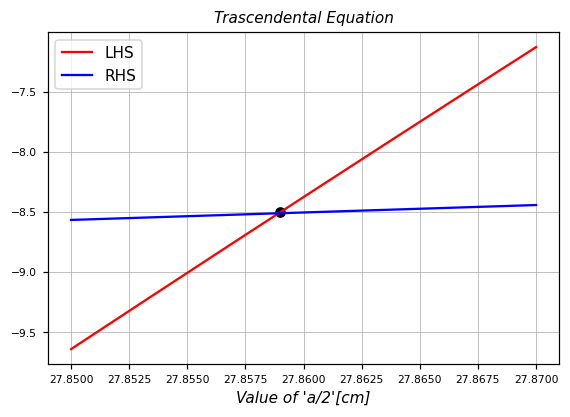

In [ ]:
#Plotting the trascendental equation to evaluate the Core Width

s = sp.Symbol("s")

LHS_detM_val = LHS_detM.subs({Bmb:Bmb_val, Bmc:Bmc_val, Db:Db_val, b:b_val, Dr:Dr_val, Lr:Lr_Q3val, (a/2):s})
RHS_detM_val = RHS_detM.subs({Bmb:Bmb_val, Bmc:Bmc_val, Db:Db_val, b:b_val, Dr:Dr_val, Lr:Lr_Q3val, Dc:Dc_val, (a/2):s})

LHS_detM_lambda1 = sp.lambdify(s,LHS_detM_val)
RHS_detM_lambda1 = sp.lambdify(s,RHS_detM_val)

k = np.linspace(27.85,27.87,600)

LHS_detM_lambda2 = LHS_detM_lambda1(k)/(10**-14)
RHS_detM_lambda2 = RHS_detM_lambda1(k)/(10**-14)

plt.figure(figsize=[6,4], dpi=110)
plt.plot(k,LHS_detM_lambda2,color="red", label="LHS")
plt.plot(k,RHS_detM_lambda2,color="blue", label="RHS")

plt.title("Trascendental Equation",fontsize=10,fontstyle="italic")
plt.xlabel("Value of 'a/2'[cm]",fontsize=10,fontstyle="italic")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(fontsize=10)
plt.grid("gray",linewidth=0.5, linestyle="-")

a_half_val = round((27.8575 + 27.8600)/2,3)
plt.scatter(a_half_val ,LHS_detM_lambda1(a_half_val )/(10**-14), marker="o",color="black")
print("Graphically we can evaluate 'a/2' as:  " + str(a_half_val) + " cm\n")

The Problem asks also for a comparison between Problem 2 and Problem 3. We have just to take the same matix and determinant that we have found in the previous calculations and apply the limit to the case of a slab Core made only of Reflector and Core regions. This situation can be described as:

* $b=0\;cm$
* $(B_{m}^{B})^2 = \frac{1}{L_R^2}$

Graphically we can evaluate 'a/2' as:  25.258 cm



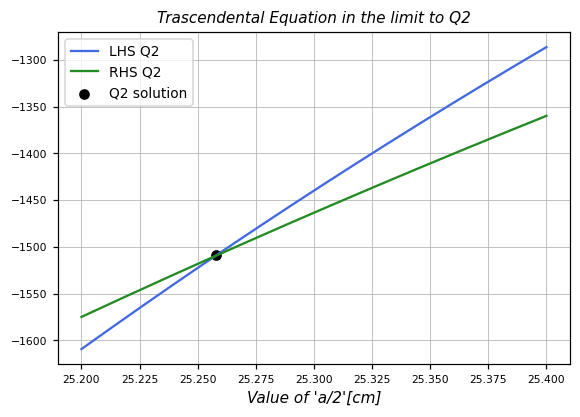

In [ ]:
#Comparison between Problem 2 and Problem 3

#Problem 2 (b=0cm, 1/Lr^2 = Bmb^2)
LHS_case2 = LHS_detM.subs(b,0)
LHS_case22 = LHS_case2.subs({Bmb:(1/Lr_Q3val), Bmc:Bmc_val, Db:Db_val, Dr:Dr_val, Lr:Lr_Q3val, (a/2):s})
RHS_case2 = RHS_detM.subs(b,0)
RHS_case22 = RHS_case2.subs({Bmb:(1/Lr_Q3val), Bmc:Bmc_val, Db:Db_val, Dr:Dr_val, Lr:Lr_Q3val, Dc:Dc_val, (a/2):s})

LHS_case2_lambda1 = sp.lambdify(s,LHS_case22)
RHS_case2_lambda1 = sp.lambdify(s,RHS_case22)

#lambdified functions
p = np.linspace(25.2,25.4,600)

LHS_case2_lambda2 = LHS_case2_lambda1(p)/(10**-14)
RHS_case2_lambda2 = RHS_case2_lambda1(p)/(10**-14)

plt.figure(figsize=[6,4], dpi=110)
plt.plot(p,LHS_case2_lambda2, color="royalblue", label="LHS Q2")
plt.plot(p,RHS_case2_lambda2, color="forestgreen", label="RHS Q2")

plt.title("Trascendental Equation in the limit to Q2",fontsize=10,fontstyle="italic")
plt.xlabel("Value of 'a/2'[cm]",fontsize=10,fontstyle="italic")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid("gray",linewidth=0.5, linestyle="-")
plt.scatter(25.258, LHS_case2_lambda1(25.258)/(10**-14), marker="o",color="black", label="Q2 solution")
plt.legend(fontsize=9)

print("Graphically we can evaluate 'a/2' as:  " + str(25.258) + " cm\n")

**RECAP FINAL SOLUTION**

*DIMENSIONS:*

* $Width\;\frac{a}{2} = 25.2052\;cm\;(Core\;Region)$
* $Width\;Problem\;2 = 25.258\;cm\;(Limit\;to\;Problem\;2)$

*COMPARISONS:*

As we can see if we impose the conditions on our Problem 3 such that we are describing the same situation of Problem 2 (which means $b=0\;cm$ and $B_{m}^{B} = \frac{1}{L_R}$), we find a value for the Width a little bit greater than that in Problem 2 ($\frac{a}{2}=25\;cm$) because now the structure has two regions at lower temperature, hence the absorption is greater in the latter case.

Comparing (for the same conditions) Problem 2 and Problem 3 I have a shorter distance in the last excercise since we have the blanket and not only the reflector region surrounding the Core Slab. However this difference is minimum.

#QUESTION 4

*In an usupervised room of a nuclear power plant, there is a cylindrical tank containing a mixtrure of Berillyum and* ${^{235}U}$. *The clylinder has a sub-critical configuration with ratio* $\frac{B_{m}^2}{B_{g}^2}=0.75$, *radius* $R=20\;cm$ *and height* $H=40\;cm$. *Now, a person accidentally sits on top of the cylinder. Assume that:*

* *The person can be approximated as a cylinder with radius* $R=20\;cm$
* *The person is a homogeneous medium composed of Water*
* *Neglect all surfaces and media (floor,air,etc.) near the cylinder and all other materials contained within the cylinder and the worker*
* *For both regions the one-speed diffusion model can be used, also neglecting the extrapolated lenght*

*Using the data reported below, compute the height* $H_P$ *of the person for which the system becomes critical. Repeat the procedure using* $\frac{B_{m}^2}{B_{g}^2}=0.93$ *and discuss the safetyof the tank.*

**DATA:**

\begin{aligned}
{^{235}U}-Be\;:\;\;\;&\nu=2.4\;\;;\;\;\Sigma_{a}^{U}=0.01297\;cm^{-1}\;\;;\;\;D_T=0.7\;cm\;\;;\;\;\Sigma_{a}^{Be}=0.0013\;cm^{-1} \\
&\\
H_2 O\;:\;\;\;&L_P=2.85\;cm\;\;;\;\;D_P=0.16\;cm \\
&\\
Case\;1\;:\;\;\;&\frac{B_{m}^2}{B_{g}^2}=0.75 \\
&\\
Case\;2\;:\;\;\;&\frac{B_{m}^2}{B_{g}^2}=0.93 \\
&\\
&\\
\end{aligned}

**RESOLUTION:**

We are treating two cylinders for which the Helmoltz equations for fluxes are:

\begin{aligned}
&\\
&\frac{1}{r}\;\frac{\partial}{\partial r}\;r\;\frac{\partial \phi_T}{\partial r} + \frac{\partial^2 \phi_T}{\partial z^2} + (B_{m}^{T})^2\;\phi_T(r,z) = 0\;\;\;\;\;;\;\;\;\;\;z \leq 0\;\;,\;\;0 \leq r \leq R\\
&\\
&\frac{1}{r}\;\frac{\partial}{\partial r}\;r\;\frac{\partial \phi_P}{\partial r} + \frac{\partial^2 \phi_P}{\partial z^2} - \frac{1}{L_P^2}\;\phi_P(r,z) = 0\;\;\;\;\;;\;\;\;\;\;z \ge 0\;\;,\;\;0 \leq r \leq R\\
&\\
\end{aligned}

I have choosen to place the interface in location $z=0$; in this way we have the Tank cylinder expressed for $z < 0$.

If we use the *separation of variable* by seeking the solution in the form:

\begin{equation}
\\
\phi_i(r,z) = Z_i(z)\;R_i(r) \\
\\
\end{equation}

and applying the separation also to the costants $(B_{m}^{T})^2$ and $\frac{1}{L_P^2}$:

\begin{aligned}
&\\
*\;\;\;&(B_{m}^{T})^2 = \alpha ^2 + \gamma ^2 \\
&\\
*\;\;\;&-\frac{1}{L_P^2} = \beta ^2 -\delta ^2 \\
&\\
\end{aligned}

We can express the two equations as follow:

**EQUATIONS:**

\begin{aligned}
&\\
Tank\;Cylinder\;Equations:\;\;\;&(a)\;\;\;\;\frac{1}{r}\;\frac{\partial}{\partial r}\;r\;\frac{\partial R_T}{\partial r} + \alpha^2 R_T(r) = 0 \\
&\\
&(b)\;\;\;\;\frac{\partial^2 Z_T}{\partial z^2} + \gamma^2 Z_T(z) = 0 \\
&\\
Person\;Cylinder\;Equations:\;\;\;&(c)\;\;\;\;\frac{1}{r}\;\frac{\partial}{\partial r}\;r\;\frac{\partial R_P}{\partial r} + \beta^2 R_P(r) = 0 \\
&\\
&(d)\;\;\;\;\frac{\partial^2 Z_P}{\partial z^2} - \delta^2 Z_P(z) = 0 \\
&\\
\end{aligned}

for which the solutions are well known to be:

**SOLUTIONS:**

\begin{aligned}
&\\
Tank\;Cylinder\;Solutions:\;\;\;&(a)\;\;\;\;R_T(r) = 
A_T^R\;J_0(\alpha\,r) + B_T^R\;Y_0(\alpha\,r) \\
&\\
&(b)\;\;\;\;Z_T(z) = A_T^Z\;cos(\gamma\,z) + B_T^Z\;sin(\gamma\,z) \\
&\\
Person\;Cylinder\;Solutions:\;\;\;&(c)\;\;\;\;R_P(r) = 
A_P^R\;J_0(\beta\,r) + B_P^R\;Y_0(\beta\,r) \\
&\\
&(d)\;\;\;\;Z_P(z) = A_P^Z\;cosh(\delta\,z) + B_P^Z\;sinh(\delta\,z) \\
&\\
\end{aligned}

**BOUNDARY CONDITIONS:**

\begin{aligned}
&\\
(a)\;\;\;\;&R_T(R) = 0 \\
&\\
(b)\;\;\;\;&R_P(R) = 0 \\
&\\
(c)\;\;\;\;&Z_T(-H_T) = 0 \\
&\\
(d)\;\;\;\;&Z_P(H_P) = 0 \\
&\\
(e)\;\;\;\;&\phi_T(r,0) = \phi_P(r,0) \\
&\\
(f)\;\;\;\;&J_T(r,0) = J_P(r,0) \\
&\\
\end{aligned}


(the other passages will be described along with the relative script).

In [ ]:
#Data

R_val = 20#cm
Ht_val = 40#cm
nubarQ4_val = 2.4
Sigmaa_UQ4_val = 0.01297#cm^-1
Sigmaa_BeQ4_val = 0.0013#cm^-1
Dt_Q4_val = 0.7#cm
Lp_val = 2.85#cm
Dp_Q4_val = 0.16#cm
ratioB1 = 0.75
ratioB2 = 0.93

#Variables and Functions

r, z = sp.symbols("r, z") #coordinates

R, Ht, Hp = sp.symbols("R, H_T, H_P")
Dt, Dp = sp.symbols("D_T, D_P")

alpha, gamma, beta, delta = sp.symbols("alpha, gamma, beta, delta") #separation of variables

Lp = sp.Symbol("L_P")

Atr, Atz, Btr, Btz = sp.symbols("A_{T}^{R}, A_{T}^{Z}, B_{T}^{R}, B_{T}^{Z}") #coefficients for solutions
Apr, Apz, Bpr, Bpz = sp.symbols("A_{P}^{R}, A_{P}^{Z}, B_{P}^{R}, B_{P}^{Z}")

PhiT, PhiP = sp.symbols("\phi_T, \phi_P", cls=sp.Function) #fluxes
JT, JP = sp.symbols("J_T, J_P", cls=sp.Function)           #currents

Rt, Zt, Rp, Zp = sp.symbols("R_T, Z_T, R_P, Z_P", cls=sp.Function) #radial and vertical separated functions

In [ ]:
#EQUATIONS

#Tank Cylinder Radial Equation
RadialT_Equation = sp.Eq((1/r)*Rt(r).diff(r) + Rt(r).diff(r,2) + (alpha**2)*Rt(r) , 0)
RadialT_Equation

Eq(alpha**2*R_T(r) + Derivative(R_T(r), (r, 2)) + Derivative(R_T(r), r)/r, 0)

In [ ]:
#Tank Cylinder Assial Equation
VerticalT_Equation = sp.Eq(Zt(z).diff(z,2) + (gamma**2)*Zt(z) , 0)
VerticalT_Equation

Eq(gamma**2*Z_T(z) + Derivative(Z_T(z), (z, 2)), 0)

In [ ]:
#Person Cylinder Radial Equation
RadialP_Equation = sp.Eq((1/r)*Rp(r).diff(r) + Rp(r).diff(r,2) + (beta**2)*Rp(r) , 0)
RadialP_Equation

Eq(beta**2*R_P(r) + Derivative(R_P(r), (r, 2)) + Derivative(R_P(r), r)/r, 0)

In [ ]:
#Person Cylinder Assial Equation
VerticalP_Equation = sp.Eq(Zp(z).diff(z,2) + (delta**2)*Zp(z) , 0)
VerticalP_Equation

Eq(delta**2*Z_P(z) + Derivative(Z_P(z), (z, 2)), 0)

As we can see, these equations have known solutions: Bessel solution for the radial part and a summation of cosines ans sines for the z-axis part.

In [ ]:
#SOLUTIONS

#Tank Cylinder Radial Solution
RadialT_Solution = sp.Eq(Rt(r) , Atr*sp.besselj(0,alpha*r) + Btr*sp.bessely(0,alpha*r))

#since lim(Yo) for r->0 is 00:
RadialT_Solution = RadialT_Solution.subs(Btr,0)
RadialT_Solution

Eq(R_T(r), A_{T}^{R}*besselj(0, alpha*r))

In [ ]:
#Person Cylinder Radial Solution
RadialP_Solution = sp.Eq(Rp(r) , Apr*sp.besselj(0,beta*r) + Bpr*sp.bessely(0,beta*r))

#since lim(Yo) for r->0 is 00:
RadialP_Solution = RadialP_Solution.subs(Bpr,0)
RadialP_Solution

Eq(R_P(r), A_{P}^{R}*besselj(0, beta*r))

In [ ]:
#Tank Cylinder Assial Solution
VerticalT_Solution = sp.Eq(Zt(z) , Atz*sp.cos(gamma*z) + Btz*sp.sin(gamma*z))
VerticalT_Solution

Eq(Z_T(z), A_{T}^{Z}*cos(gamma*z) + B_{T}^{Z}*sin(gamma*z))

In [ ]:
#Person Cylinder Assial Solution
VerticalP_Solution = sp.Eq(Zp(z) , Apz*sp.cosh(delta*z) + Bpz*sp.sinh(delta*z))
VerticalP_Solution

Eq(Z_P(z), A_{P}^{Z}*cosh(delta*z) + B_{P}^{Z}*sinh(delta*z))

In [ ]:
#Imposing BC (a) Rt(R)=0 , avoiding Atr=0, we have just selected the first zero of the Bessel function

BCa_Equation = sp.Eq(RadialT_Solution.rhs , 0)
print("Equation to solve: " + str(BCa_Equation) + "\n")
BCa_Solution = sp.Eq(alpha , (nu0/R))
BCa_Solution

Equation to solve: Eq(A_{T}^{R}*besselj(0, alpha*r), 0)



Eq(alpha, nu_0/R)

In [ ]:
#Imposing BC (b) Rp(R)=0 , avoiding Apr=0, we have just selected the first zero of the Bessel function

BCb_Equation = sp.Eq(RadialP_Solution.rhs , 0)
print("Equation to solve: " + str(BCb_Equation) + "\n")
BCb_Solution = sp.Eq(beta, (nu0/R))
BCb_Solution

Equation to solve: Eq(A_{P}^{R}*besselj(0, beta*r), 0)



Eq(beta, nu_0/R)

In [ ]:
#Imposing BC (c) Zt(-Ht)=0

Zt_inHt = VerticalT_Solution.rhs.subs(z,-Ht)
BCc_Equation = sp.Eq(Zt_inHt , 0)
Atz_Solution = sp.solve(BCc_Equation , Atz)[0]
BCc_Solution_Eq = sp.Eq(Atz , Atz_Solution )
BCc_Solution_Eq

Eq(A_{T}^{Z}, B_{T}^{Z}*tan(H_T*gamma))

In [ ]:
#Imposing BC (d) Zp(Hp)=0

Zp_inHp = VerticalP_Solution.rhs.subs(z,Hp)
BCd_Equation = sp.Eq(Zp_inHp , 0)
Apz_Solution = sp.solve(BCd_Equation , Apz)[0]
BCd_Solution_Eq = sp.Eq(Apz , Apz_Solution )
BCd_Solution_Eq

Eq(A_{P}^{Z}, -B_{P}^{Z}*tanh(H_P*delta))

In [ ]:
#Sobstitution of beta and alpha in the solutions

RadialT_Solution_new = RadialT_Solution.subs(beta , BCa_Solution.rhs)
RadialP_Solution_new = RadialP_Solution.subs(alpha , BCb_Solution.rhs)

In [ ]:
#Sobstitution of Atz and Apz in the solutions

VerticalT_Solution_new = VerticalT_Solution.subs(Atz , Atz_Solution)
VerticalP_Solution_new = VerticalP_Solution.subs(Apz , Apz_Solution)

In [ ]:
#FLUXES

#Tank Flux
Tank_Flux_Equation = sp.Eq(PhiT(r,z) , RadialT_Solution_new.rhs * VerticalT_Solution_new.rhs)
Tank_Flux_Equation = Tank_Flux_Equation.subs(alpha , BCa_Solution.rhs)
Tank_Flux_Equation

Eq(\phi_T(r, z), A_{T}^{R}*(B_{T}^{Z}*sin(gamma*z) + B_{T}^{Z}*cos(gamma*z)*tan(H_T*gamma))*besselj(0, nu_0*r/R))

In [ ]:
#Person Flux
Person_Flux_Equation = sp.Eq(PhiP(r,z) , RadialP_Solution_new.rhs * VerticalP_Solution_new.rhs)
Person_Flux_Equation = Person_Flux_Equation.subs(beta , BCb_Solution.rhs)
Person_Flux_Equation

Eq(\phi_P(r, z), A_{P}^{R}*(B_{P}^{Z}*sinh(delta*z) - B_{P}^{Z}*cosh(delta*z)*tanh(H_P*delta))*besselj(0, nu_0*r/R))

In [ ]:
#Imposing BC (e) PhiT(0,r) = PhiP(0,r)

Tank_Flux_0r = Tank_Flux_Equation.subs(z,0)
Person_Flux_0r = Person_Flux_Equation.subs(z,0)

tgh = sp.Symbol("tanh")

BCe_Equation = sp.Eq(Tank_Flux_0r.rhs , Person_Flux_0r.rhs)
BCe_Equation = BCe_Equation.subs(sp.tanh(Hp*delta) , tgh)
BCe_Solution = sp.solve(BCe_Equation , tgh)[0]
BCe_Solution_Eq = sp.Eq(sp.tanh(delta*Hp) , BCe_Solution)

Ct, Cp = sp.symbols("C_T, C_P")

BCe_Solution_Eq = BCe_Solution_Eq.subs({Atr*Btz:Ct, Apr*Bpz:Cp})
BCe_Solution_Eq

Eq(tanh(H_P*delta), -C_T*tan(H_T*gamma)/C_P)

In [ ]:
#Imposing BC (f) JT(0,r) = JP(0,r)

CurrentT = - Dt * Tank_Flux_Equation.rhs.diff(z)
CurrentP = - Dp * Person_Flux_Equation.rhs.diff(z)

CurrentT_0r = CurrentT.subs(z,0)
CurrentP_0r = CurrentP.subs(z,0)

CurrentT_0r = CurrentT_0r.subs(Atr*Btz,Ct)
CurrentP_0r = CurrentP_0r.subs(Apr*Bpz,Cp)

BCf_Equation = sp.Eq(-CurrentT_0r + CurrentP_0r , 0)
BCf_Solution_Ct = sp.solve(BCf_Equation , Ct)[0]
BCf_Solution_Eq = sp.Eq(Ct/Cp , BCf_Solution_Ct/Cp)
BCf_Solution_Eq

Eq(C_T/C_P, D_P*delta/(D_T*gamma))

If we mix the results from application of BC (e) and (f) we obtain an equation that have just $H_P$ as unknown term, because we can compute $\gamma$ and $\delta$.

In [ ]:
#Mixing BC (e) and (f)

BCe_Solution_Eq_new = BCe_Solution_Eq.subs(Ct/Cp , BCf_Solution_Eq.rhs)
BCe_Solution_Eq_new

Eq(tanh(H_P*delta), -D_P*delta*tan(H_T*gamma)/(D_T*gamma))

In [ ]:
#Evaluated solution
BCe_Solution_Eq_eval = BCe_Solution_Eq_new.subs({Dt:Dt_Q4_val, Dp:Dp_Q4_val, Ht:Ht_val})
BCe_Solution_Eq_eval

Eq(tanh(H_P*delta), -0.228571428571429*delta*tan(40*gamma)/gamma)

We can recall the definition for separation coefficients:

\begin{aligned}
&\\
*\;\;\;&(B_{m}^{T})^2 = \alpha ^2 + \gamma ^2 \\
&\\
*\;\;\;&-\frac{1}{L_P^2} = \beta ^2 -\delta ^2 \\
&\\
\end{aligned}

For what concers the first equation, $\alpha$ has been computed, we have to compute $(B_{m}^{T})^2$. We know from data the value of the ratio between *Material Buckling* and *Geometric Buckling*; we can apply the relationship between the two also knowing that:

\begin{equation}
(B_g^T)^2 = (\frac{\nu_0}{R})^2 + (\frac{\pi}{H_T})^2
\end{equation}

We have to evaluate for both the two cases.

On the other hand, for what concerns the second equation, the value of $\beta$ is equal to that of $\alpha$ because they are solution of the Bessel Function $J_0$, and the value of the Diffusion Lenght is given by the text.

In [ ]:
#Second Equation for constants

delta_Eq = sp.Eq(delta**2 , beta**2 + (1/(Lp**2)))
delta_Eq = delta_Eq.subs({beta:BCb_Solution.rhs})
delta_Eq = delta_Eq.subs({nu0:nu0_val, R:R_val, Lp:Lp_val})
delta_Sol = sp.solve(delta_Eq , delta)[1] #gamma>0

print("Solution for Delta: " + str(delta_Sol))

Solution for Delta: 0.370910861333620


In [ ]:
#First Equation for constants

BgQ4 = sp.sqrt((nu0/R)**2 + (sp.pi/Ht)**2)

#Case 1 - ratio=0,75
gamma_Eq1 = sp.Eq(gamma**2 , ratioB1*(BgQ4**2) - alpha**2)
gamma_Eq1 = gamma_Eq1.subs({alpha:BCa_Solution.rhs})
gamma_Eq1 = gamma_Eq1.subs({nu0:nu0_val, R:R_val, Ht:Ht_val})
gamma_Sol1 = sp.solve(gamma_Eq1 , gamma)[1]

print("Solution for Gamma in Case 1: " + str(gamma_Sol1))

#Case 2 - ratio=0,93
gamma_Eq2 = sp.Eq(gamma**2 , ratioB2*(BgQ4**2) - alpha**2)
gamma_Eq2 = gamma_Eq2.subs({alpha:BCa_Solution.rhs})
gamma_Eq2 = gamma_Eq2.subs({nu0:nu0_val, R:R_val, Ht:Ht_val})
gamma_Sol2 = sp.solve(gamma_Eq2 , gamma)[1]

print("\nSolution for Gamma in Case 2: " + str(gamma_Sol2))

Solution for Gamma in Case 1: 0.0318019093453622

Solution for Gamma in Case 2: 0.0687350215183875


In [ ]:
#Solution for Case 1

BCe_Solution_Eq_eval1 = BCe_Solution_Eq_eval.subs({gamma:gamma_Sol1})
Solution_Case1 = sp.solve(BCe_Solution_Eq_eval1 , Hp*delta)[0]
Solution_Case1 = Solution_Case1/delta
Solution_Case1 = Solution_Case1.subs(delta,delta_Sol).evalf()
sp.Eq(Hp , Solution_Case1)
#the result is not valid!!! The system cannot be turned into a critical state!!!

Eq(H_P, -0.312818889907063 - 4.23496988237836*I)

In [ ]:
#Solution for Case 2

BCe_Solution_Eq_eval2 = BCe_Solution_Eq_eval.subs({gamma:gamma_Sol2,delta:delta_Sol})
Equation_Case2 = sp.Eq(delta_Sol*Hp , sp.atanh(BCe_Solution_Eq_eval2.rhs))
Solution_Case2 = sp.solve(Equation_Case2  , Hp)[0]
sp.Eq(Hp , round(Solution_Case2,3))
#The result mirrors the minimum value needed to turn the system critical!

Eq(H_P, 1.518)

**FINAL SOLUTION:**

We have obtained two different results for *Case 1* and *Case 2*: the first case describe the situation of a system that cannot be turned into a critical state, whereas the second one can be turned into a critical state with an addition of 1.518 cm of cylindrical refelctor.